In [92]:
from math import pi, cos, sin, sqrt
import sys
sys.path.append('/root/alok/github/cv_research/alok')

from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

from pyobb.pyobb.obb import OBB
from biomass_utils.points_of_interest import get_data, get_depth_cutoff, get_points_of_interest, distance_between_points

In [93]:
data_dir_base = '/root/data/blender_data/batch_v1'
idx = 0

data = get_data(data_dir_base, idx)
point_cloud, mask, annotation, image = data['point_cloud'], data['mask'], data['annotation_data'], data['image']


{u'interocular_distance': 0.6499999761581421, u'height': 20.910134548813566, u'volume': 4763.217662120647, u'width': 17.425112124011306, u'length': 104.55067274406785, u'unit_system': u'METRIC', u'focal_length': 1.0, u'sensor_height': 3.2, u'sensor_width': 1.8, u'unit': u'centimeter'}


In [94]:
fish_point_cloud = point_cloud[mask > 0]
depth_histogram = np.histogram(fish_point_cloud[:,1])
cutoff_idx = np.where(depth_histogram[0]==0)[0][0]
depth_cutoff = depth_histogram[1][cutoff_idx]
corrected_fish_point_cloud = fish_point_cloud[fish_point_cloud[:,1] < depth_cutoff]

In [95]:
obb = OBB.build_from_points([(p[0], p[1], p[2]) for p in corrected_fish_point_cloud])

In [96]:
obb.centroid

array([ 4.07372193, 75.15501342, -5.20943789])

In [97]:
obb.points

[array([ 55.58263173,  73.6060469 , -30.86374448]),
 array([ 60.81669645,  70.13306125, -13.49951455]),
 array([59.09966069, 91.70490865, -8.66740895]),
 array([ 53.86559597,  95.1778943 , -26.03163888]),
 array([-45.71815211,  55.13213255,  15.61276309]),
 array([-50.95221683,  58.60511819,  -1.75146684]),
 array([-52.6692526 ,  80.17696559,   3.08063876]),
 array([-47.43518787,  76.70397994,  20.44486869])]

In [98]:
distance_between_points(obb.points[0], obb.points[6])

113.63920356342116

In [99]:
113. / 104

1.0865384615384615

In [102]:
np.save('/root/alok/point_cloud.npy', corrected_fish_point_cloud)

In [103]:
annotation

{u'focal_length': 1.0,
 u'height': 20.910134548813566,
 u'interocular_distance': 0.6499999761581421,
 u'length': 104.55067274406785,
 u'sensor_height': 3.2,
 u'sensor_width': 1.8,
 u'unit': u'centimeter',
 u'unit_system': u'METRIC',
 u'volume': 4763.217662120647,
 u'width': 17.425112124011306}

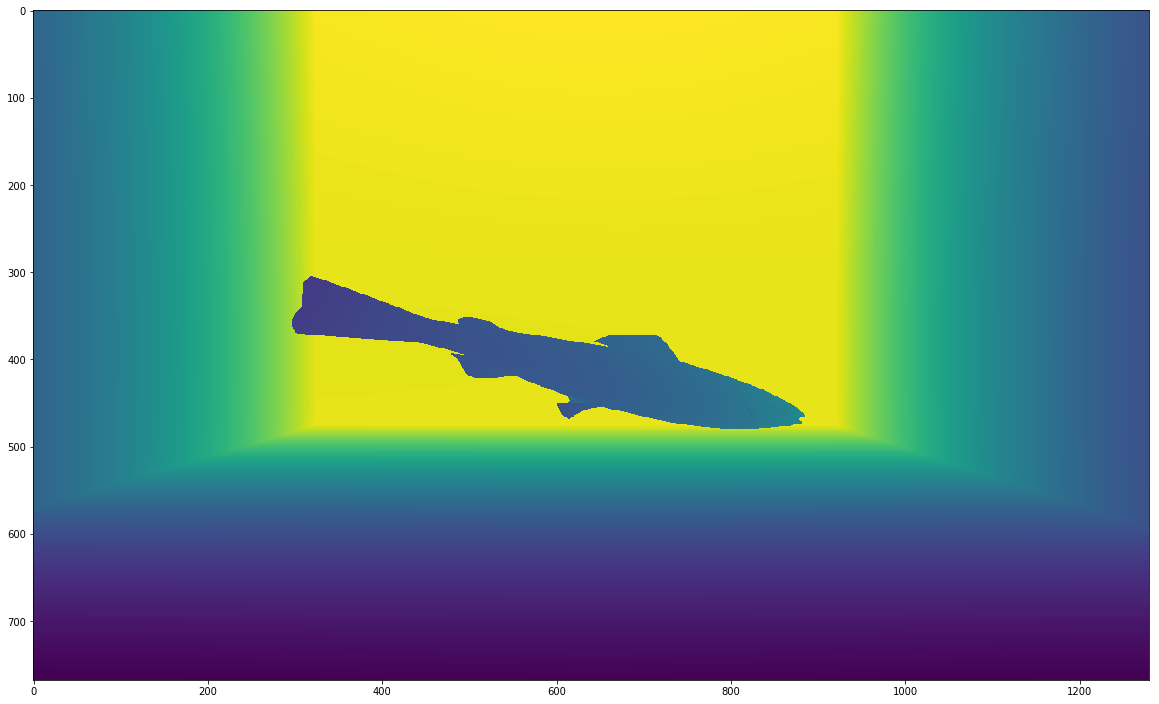

In [87]:
plt.figure(figsize=(20, 20))
plt.imshow(point_cloud[:,:,1])

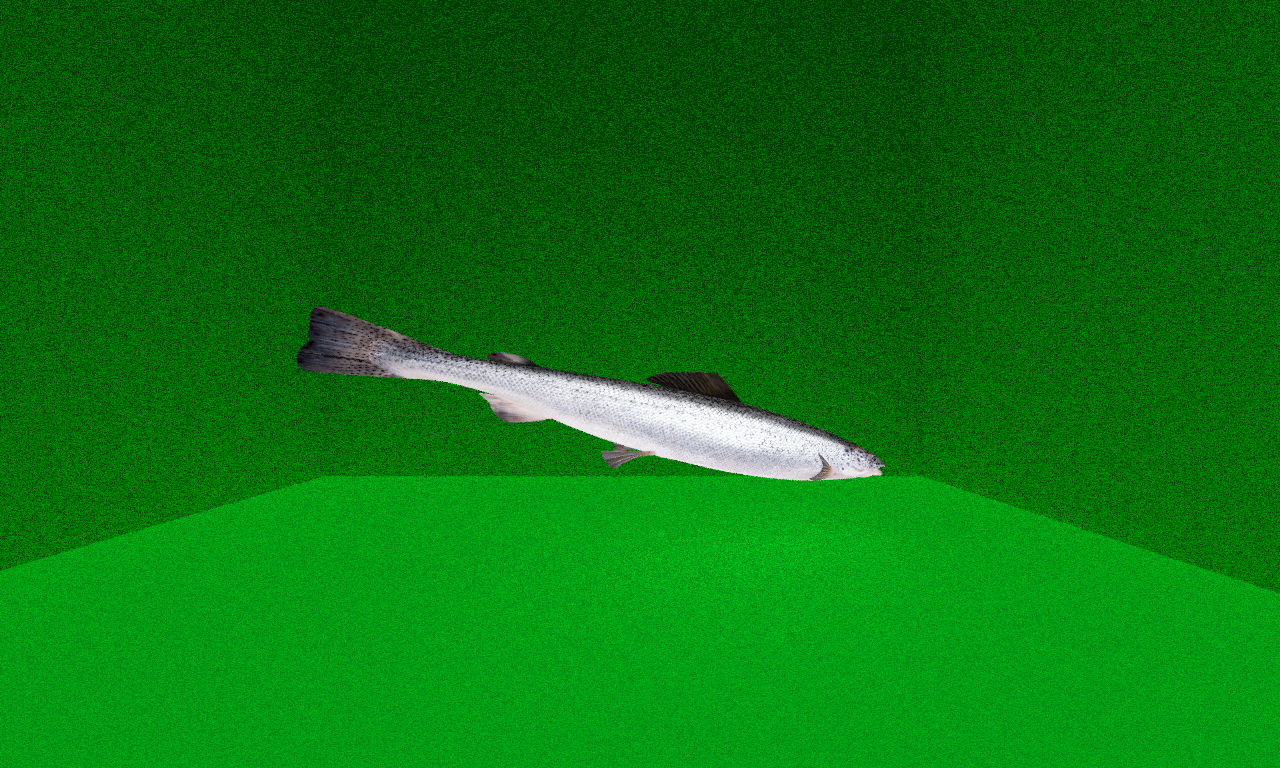

In [89]:
Image.open('{}/stereo_images/left_0.png'.format(data_dir_base))

In [ ]:
Image.open('{}/stereo_images/right_0.png'.format(data_dir_base))

In [12]:

# creates a lat/lon sphere with a given radius and centered at a given point
def sphere(radius, center, num_slices=30):
    theta_step = 2.0 * pi / (num_slices - 1)
    phi_step = pi / (num_slices - 1.0)
    theta = 0.0
    vertices = []
    for i in range(0, num_slices):
        cos_theta = cos(theta)
        sin_theta = sin(theta)
        phi = 0.0
        for j in range(0, num_slices):
            x = -sin(phi) * cos_theta
            y = -cos(phi)
            z = -sin(phi) * sin_theta
            n = sqrt(x * x + y * y + z * z)
            if n < 0.99 or n > 1.01:
                x /= n
                y /= n
                z /= n
            vertices.append((x * radius + center[0],
                             y * radius + center[1],
                             z * radius + center[2]))
            phi += phi_step
        theta += theta_step
    return vertices

obb = OBB.build_from_points(sphere(1, (0, 0, 0)))